# Ejercicio Práctico: Árbol de Decisión para Predecir Supervivencia en el Titanic


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # este es el clasificador de árbol de decisión
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Ahora realizamos el preprocesamiento de los datos

# Seleccionamos las columnas relevantes
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Convertir 'Sex' a valores numéricos
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
"""
.map() es un método de pandas que se utiliza para mapear valores de una serie a otros valores.
"""
# Rellenar valores nulos en 'Age' con la media
df['Age'].fillna(df['Age'].mean(), inplace=True)
"""
.fillna() es un método de pandas que se utiliza para rellenar valores nulos en un DataFrame.
El primer argumento es el valor que se utilizará para rellenar los valores nulos.
El segundo argumento inplace=True se utiliza para modificar el DataFrame original en lugar de devolver una copia modificada.
"""

C:\Users\hitak\AppData\Local\Temp\ipykernel_25776\3720906968.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


'\n.fillna() es un método de pandas que se utiliza para rellenar valores nulos en un DataFrame.\nEl primer argumento es el valor que se utilizará para rellenar los valores nulos.\nEl segundo argumento inplace=True se utiliza para modificar el DataFrame original en lugar de devolver una copia modificada.\n'

In [4]:
# Dividir los datos en variables de entrada (X) y la variable objetivo (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Crear el modelo de árbol de decisión
modelo = DecisionTreeClassifier(max_depth=3, random_state=42)
"""
max_depth es un hiperparámetro que controla la profundidad máxima del árbol.
random_state es una semilla aleatoria que se utiliza para garantizar la reproducibilidad de los resultados.
"""
# Entrenar el modelo
modelo.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')


Precisión del modelo: 74.86%


# Que sigue?
-Experimenta ajustando los hiperparámetros del árbol de decisión, como la profundidad máxima (max_depth) o el número mínimo de muestras por hoja (min_samples_leaf).
-Prueba otros modelos de clasificación, como Random Forest, Support Vector Machines (SVM) o k-Nearest Neighbors (k-NN).

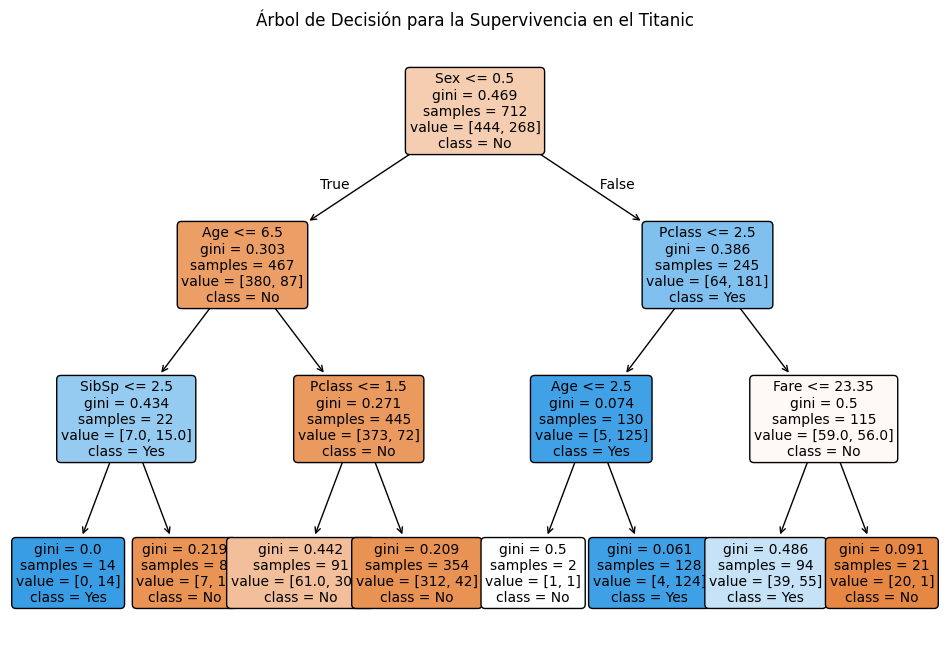

In [11]:
# grafiquemos el árbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(modelo, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=10)
plt.title("Árbol de Decisión para la Supervivencia en el Titanic")
plt.show()

# La estructura del árbol de decisión se puede interpretar de la siguiente manera:



# Nodos

- Cada rectángulo en el árbol es un nodo, que representa una decisión o división que el modelo hace sobre un atributo de los datos.

- Los nodos superiores representan las divisiones más importantes, mientras que los nodos más bajos son decisiones más específicas.

- Divisiones/Reglas:

Las divisiones del árbol se basan en condiciones lógicas. Por ejemplo, en el nodo raíz (el primer nodo en la parte superior), la división se basa en el atributo Sex (género) del pasajero:

- Si Sex <= 0.5 (es decir, el pasajero es hombre), seguimos por la rama de la izquierda (True).

- Si Sex > 0.5 (es decir, el pasajero es mujer), seguimos por la rama de la derecha (False).

A medida que el árbol desciende, se van realizando más divisiones basadas en otros atributos, como la edad (Age), la clase del pasajero (Pclass), el número de hermanos/esposos a bordo (SibSp), y el precio del boleto (Fare).



# Árboles de Decisión para Predicción de Supervivencia en el Titanic

Este proyecto utiliza un **árbol de decisión** para predecir la supervivencia de los pasajeros del Titanic basándose en características como la clase, el sexo, la edad y más. Vamos a explicar qué son los árboles de decisión, cómo funcionan y cómo interpretar sus resultados con un ejemplo práctico.

## 1. ¿Qué es un Árbol de Decisión?

Un **árbol de decisión** es un modelo de aprendizaje supervisado que se utiliza tanto para **clasificación** como para **regresión**. Es fácil de entender ya que funciona como un conjunto de decisiones simples:

- Cada **nodo** del árbol representa una **pregunta** o **decisión** basada en una característica de los datos.
- Cada **rama** representa la **respuesta** a esa pregunta (ej. "Sí" o "No").
- Las **hojas** del árbol contienen las **decisiones finales** o predicciones.

En el caso de nuestro ejemplo del Titanic, el árbol de decisión nos ayudará a predecir si un pasajero sobrevivió o no basado en preguntas sobre características como la **edad**, el **sexo**, y la **clase** del pasajero.

## 2. ¿Cómo Funciona el Modelo?

### Datos Usados

Utilizamos el dataset clásico del Titanic, que contiene información sobre los pasajeros, como:
- **Pclass**: La clase del pasajero (1ª, 2ª o 3ª clase).
- **Sex**: El sexo del pasajero (masculino o femenino).
- **Age**: La edad del pasajero.
- **SibSp**: Número de hermanos o esposos a bordo.
- **Parch**: Número de padres o hijos a bordo.
- **Fare**: La tarifa pagada por el boleto.

### Proceso de Creación del Árbol

1. **Entrenamiento**: El árbol de decisión aprende del dataset del Titanic. Analiza las características de los pasajeros que sobrevivieron y los que no sobrevivieron para encontrar las mejores preguntas (nodos) que permitan clasificar si alguien sobrevivirá o no.
2. **División de los datos**: Basado en las características de los pasajeros, el árbol toma decisiones secuenciales (como "¿El pasajero es hombre o mujer?" o "¿El pasajero es mayor de 30 años?").
3. **Predicción**: Cada vez que el árbol llega a una hoja, hace una predicción de si el pasajero sobrevivió o no, basándose en los datos.

## 3. Resultado: El Árbol de Decisión

A continuación, te explicamos los elementos clave del árbol que generamos en este proyecto:

### Explicacion del grafico anterior

### Elementos del Árbol de Decisión:

1. **Nodos**:
   - Los nodos en cada nivel del árbol representan preguntas que el modelo hace para dividir los datos. En este caso, el nodo raíz (el de más arriba) pregunta si el pasajero es hombre o mujer (`Sex <= 0.5`).
   
2. **Gini**:
   - El índice de Gini es una medida de la pureza de los datos en ese nodo. Un valor de Gini de 0 significa que todos los pasajeros en ese nodo pertenecen a la misma clase (por ejemplo, todos sobrevivieron o todos no sobrevivieron), mientras que un valor cercano a 0.5 significa que los datos están más mezclados. En la imagen, puedes ver que el nodo raíz tiene un `gini = 0.469`, lo que indica una mezcla moderada entre los que sobrevivieron y no.

3. **Samples**:
   - Muestra cuántos pasajeros están siendo clasificados en ese nodo. En el nodo raíz, tenemos `samples = 712`, lo que significa que se están considerando 712 pasajeros en esa división inicial.

4. **Value**:
   - Indica la distribución de las clases (supervivientes y no supervivientes). Por ejemplo, en el nodo raíz, `value = [444, 268]` significa que 444 pasajeros no sobrevivieron y 268 pasajeros sí lo hicieron.

5. **Class**:
   - La clase predominante en ese nodo. En el nodo raíz, la clase es **No** (la mayoría de los pasajeros en este nodo no sobrevivieron).

### Interpretación del Árbol

- **Nodo Raíz**: El árbol primero se pregunta si el pasajero es hombre (`Sex <= 0.5`). Si es hombre, pasa a la rama de la izquierda, y si es mujer, a la derecha.
  
- **Rama Izquierda (hombres)**: Luego, se hace una pregunta sobre la **edad** del pasajero (`Age <= 6.5`). Esto ayuda a clasificar si los hombres jóvenes (menores de 6.5 años) tenían más probabilidades de sobrevivir.

- **Rama Derecha (mujeres)**: Para las mujeres, el árbol pregunta sobre la **clase** (`Pclass <= 2.5`). Esto muestra que las mujeres de clases más altas tenían una mayor probabilidad de sobrevivir.

Al seguir cada una de estas ramas, el árbol va afinando sus decisiones hasta llegar a los nodos finales (las hojas), donde se hace la predicción final de si un pasajero sobrevivió o no.

### Conclusión

Este árbol de decisión permite visualizar claramente cómo diferentes características influyen en la predicción de la supervivencia. Al realizar estas divisiones basadas en preguntas simples, el modelo es capaz de hacer predicciones sobre nuevos pasajeros.

## 4. Ejercicio para Practicar

Como ejercicio, puedes intentar cambiar los parámetros del modelo, como la profundidad máxima del árbol (`max_depth`), o agregar más características, como el **puerto de embarque** (`Embarked`), para ver si puedes mejorar la precisión del modelo.


